<a href="https://colab.research.google.com/github/pacomm5/Plantillas/blob/main/SVR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MEJOR LO LLAMAMOS SVR SUPER VECTOR REGRESION vamos a hablar de las maquinas de super vector machine. sirven tanto para las regresiones lineales como no lineales.
nos imaginanos una calle con una recta y dos lineas arriba y abajo. lo que intenta es que queden el mayor numero de lineas dentro de este pasillo. la anchura de las calles será epsilon. 
- tendremos que hacer un conjunto de entrenamiento
- el trabajo de SVM va a buscar una función que se aproxime a y. 
- EN RESUMEN
    - en SVM el objetivo es que los errores no superen los epsilon, es decir el umbral establecido. 

# Clonamos el repositorio para obtener los dataSet

In [ ]:
#!git clone https://github.com/joanby/machinelearning-az.git
! git clone https://github.com/pacomm5/machinelearning-az # de esta manera lo que hacemos es acceder a todos los datasets mios de github. en este caso de marchine learning de la a a la z

fatal: destination path 'machinelearning-az' already exists and is not an empty directory.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Test it

In [ ]:
!ls '/content/drive/My Drive' 

#Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

#Instalar dependendias

In [ ]:
!pip install sklearn

# SVR

# Cómo importar las librerías


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [ ]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


In [ ]:
dataset.head(7)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000


In [ ]:
print(X.shape)
print(y.shape)

(10, 1)
(10,)


# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [ ]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

# Escalado de variables

In [ ]:
from sklearn.preprocessing import StandardScaler
# utilizamos dos escaladores uno para X y otro para y
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
print(X.shape)
print(y.shape)
# en teoría esta bien, porque tiene que dar esta forma. 

(10, 1)
(10, 1)


# Ajustar la regresión con el dataset

In [ ]:
from sklearn.svm import SVR

In [ ]:
regression = SVR(kernel = "rbf") # utilizamos un kernel gaussiano, pero podemos utilizar lineal, polinomica, sigmoide. 
# si ya sabemos que no es lineal, es mejor probar con otro por ejemplo con un polinímico o sigmoide o rbf. 
regression.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(X.shape)
print(y.shape)

(10, 1)
(10, 1)


In [ ]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Predicción de nuestros modelos con SVR


parece que me ha salido tengo que verlo con detenimiento

In [ ]:
y_pred = sc_y.inverse_transform(regression.predict(sc_X.transform(np.array([[6.5]]))).reshape(-1,1))

In [ ]:
y_pred

array([[252789.13921624]])

# Visualización de los resultados del SVR

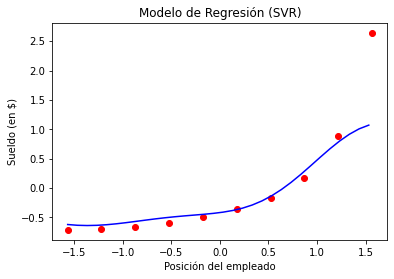

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()
# estamos deshechando el sueldo del CEO. 